# Train a JointVAE model

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
from viz.visualize import Visualizer
use_cuda = torch.cuda.is_available()
use_cuda

True

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # change to your device

### Prepare a list of image paths

In [4]:
from utils.dataloaders import get_mnist_dataloaders, get_fashion_mnist_dataloaders
#train_loader, test_loader = get_mnist_dataloaders(batch_size=64)
train_loader, test_loader = get_fashion_mnist_dataloaders(batch_size=64)

### Define latent distribution of the model

In [5]:
# Latent distribution will be joint distribution of 10 gaussian normal distributions
# and one 10 dimensional Gumbel Softmax distribution
latent_spec = {'cont': 10,
               'disc': [10]}

### Build a model

In [6]:
from jointvae.models import VAE

model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32), use_cuda=use_cuda)

In [7]:
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

### Train the model

In [13]:
from torch import optim

# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, amsgrad=True) # added amsgrad # orig lr 5e-4

In [15]:
from jointvae.training import Trainer

# Define the capacities
# Continuous channels
cont_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0

# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,
                 use_cuda=use_cuda)

#### Initialize visualizer

In [16]:
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

In [17]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo

trainer.train(train_loader, epochs=300, save_training_gif=('./training.gif', viz))

0/60000	Loss: 458.543
3200/60000	Loss: 465.647
6400/60000	Loss: 462.091
9600/60000	Loss: 458.172
12800/60000	Loss: 460.541
16000/60000	Loss: 455.801
19200/60000	Loss: 455.184
22400/60000	Loss: 454.073
25600/60000	Loss: 450.325
28800/60000	Loss: 449.023
32000/60000	Loss: 450.854
35200/60000	Loss: 451.627
38400/60000	Loss: 450.596
41600/60000	Loss: 443.530
44800/60000	Loss: 447.700
48000/60000	Loss: 445.318
51200/60000	Loss: 445.340
54400/60000	Loss: 443.991
57600/60000	Loss: 444.349
Epoch: 1 Average loss: 451.91
0/60000	Loss: 459.706
3200/60000	Loss: 443.200
6400/60000	Loss: 439.272
9600/60000	Loss: 441.278
12800/60000	Loss: 440.777
16000/60000	Loss: 437.995
19200/60000	Loss: 441.454
22400/60000	Loss: 438.667
25600/60000	Loss: 439.573
28800/60000	Loss: 435.160
32000/60000	Loss: 436.182
35200/60000	Loss: 435.785
38400/60000	Loss: 434.634
41600/60000	Loss: 432.289
44800/60000	Loss: 432.207
48000/60000	Loss: 430.696
51200/60000	Loss: 431.757
54400/60000	Loss: 428.319
57600/60000	Loss: 425.

54400/60000	Loss: 338.173
57600/60000	Loss: 343.737
Epoch: 16 Average loss: 342.80
0/60000	Loss: 332.995
3200/60000	Loss: 342.608
6400/60000	Loss: 343.928
9600/60000	Loss: 344.737
12800/60000	Loss: 340.763
16000/60000	Loss: 339.636
19200/60000	Loss: 342.232
22400/60000	Loss: 343.594
25600/60000	Loss: 344.681
28800/60000	Loss: 339.096
32000/60000	Loss: 338.333
35200/60000	Loss: 339.876
38400/60000	Loss: 343.188
41600/60000	Loss: 343.083
44800/60000	Loss: 341.284
48000/60000	Loss: 345.277
51200/60000	Loss: 339.282
54400/60000	Loss: 340.748
57600/60000	Loss: 340.265
Epoch: 17 Average loss: 341.77
0/60000	Loss: 346.875
3200/60000	Loss: 337.916
6400/60000	Loss: 345.615
9600/60000	Loss: 339.291
12800/60000	Loss: 345.028
16000/60000	Loss: 340.822
19200/60000	Loss: 340.429
22400/60000	Loss: 338.792
25600/60000	Loss: 339.903
28800/60000	Loss: 337.950
32000/60000	Loss: 337.522
35200/60000	Loss: 338.852
38400/60000	Loss: 339.306
41600/60000	Loss: 339.082
44800/60000	Loss: 339.780
48000/60000	Loss

44800/60000	Loss: 331.344
48000/60000	Loss: 335.118
51200/60000	Loss: 328.359
54400/60000	Loss: 332.538
57600/60000	Loss: 329.622
Epoch: 32 Average loss: 329.83
0/60000	Loss: 328.478
3200/60000	Loss: 332.083
6400/60000	Loss: 328.301
9600/60000	Loss: 328.731
12800/60000	Loss: 331.123
16000/60000	Loss: 330.440
19200/60000	Loss: 329.085
22400/60000	Loss: 329.494
25600/60000	Loss: 328.621
28800/60000	Loss: 332.878
32000/60000	Loss: 326.607
35200/60000	Loss: 331.073
38400/60000	Loss: 331.591
41600/60000	Loss: 330.561
44800/60000	Loss: 332.376
48000/60000	Loss: 327.649
51200/60000	Loss: 330.119
54400/60000	Loss: 326.526
57600/60000	Loss: 329.888
Epoch: 33 Average loss: 329.90
0/60000	Loss: 329.059
3200/60000	Loss: 327.694
6400/60000	Loss: 331.534
9600/60000	Loss: 329.077
12800/60000	Loss: 329.108
16000/60000	Loss: 330.372
19200/60000	Loss: 325.869
22400/60000	Loss: 331.387
25600/60000	Loss: 332.317
28800/60000	Loss: 326.833
32000/60000	Loss: 329.960
35200/60000	Loss: 333.115
38400/60000	Loss

35200/60000	Loss: 329.420
38400/60000	Loss: 327.078
41600/60000	Loss: 329.910
44800/60000	Loss: 323.409
48000/60000	Loss: 324.074
51200/60000	Loss: 324.696
54400/60000	Loss: 331.473
57600/60000	Loss: 327.007
Epoch: 48 Average loss: 327.04
0/60000	Loss: 330.530
3200/60000	Loss: 329.502
6400/60000	Loss: 325.385
9600/60000	Loss: 327.098
12800/60000	Loss: 326.541
16000/60000	Loss: 327.030
19200/60000	Loss: 327.676
22400/60000	Loss: 327.129
25600/60000	Loss: 328.994
28800/60000	Loss: 326.339
32000/60000	Loss: 329.610
35200/60000	Loss: 324.043
38400/60000	Loss: 326.449
41600/60000	Loss: 325.360
44800/60000	Loss: 327.153
48000/60000	Loss: 328.081
51200/60000	Loss: 325.932
54400/60000	Loss: 323.100
57600/60000	Loss: 324.673
Epoch: 49 Average loss: 326.73
0/60000	Loss: 327.616
3200/60000	Loss: 325.086
6400/60000	Loss: 326.328
9600/60000	Loss: 325.848
12800/60000	Loss: 327.324
16000/60000	Loss: 324.803
19200/60000	Loss: 326.747
22400/60000	Loss: 329.344
25600/60000	Loss: 325.993
28800/60000	Loss

25600/60000	Loss: 324.919
28800/60000	Loss: 326.369
32000/60000	Loss: 327.718
35200/60000	Loss: 325.152
38400/60000	Loss: 323.036
41600/60000	Loss: 328.018
44800/60000	Loss: 323.095
48000/60000	Loss: 327.213
51200/60000	Loss: 322.307
54400/60000	Loss: 327.415
57600/60000	Loss: 326.157
Epoch: 64 Average loss: 325.41
0/60000	Loss: 329.510
3200/60000	Loss: 322.654
6400/60000	Loss: 325.469
9600/60000	Loss: 325.193
12800/60000	Loss: 326.010
16000/60000	Loss: 326.046
19200/60000	Loss: 328.048
22400/60000	Loss: 326.645
25600/60000	Loss: 325.119
28800/60000	Loss: 329.645
32000/60000	Loss: 324.289
35200/60000	Loss: 321.787
38400/60000	Loss: 322.321
41600/60000	Loss: 322.743
44800/60000	Loss: 326.867
48000/60000	Loss: 324.116
51200/60000	Loss: 329.126
54400/60000	Loss: 323.844
57600/60000	Loss: 322.969
Epoch: 65 Average loss: 325.48
0/60000	Loss: 323.391
3200/60000	Loss: 327.159
6400/60000	Loss: 327.139
9600/60000	Loss: 323.260
12800/60000	Loss: 325.899
16000/60000	Loss: 322.270
19200/60000	Loss

16000/60000	Loss: 324.827
19200/60000	Loss: 325.469
22400/60000	Loss: 325.477
25600/60000	Loss: 325.951
28800/60000	Loss: 323.732
32000/60000	Loss: 324.834
35200/60000	Loss: 321.158
38400/60000	Loss: 323.496
41600/60000	Loss: 323.670
44800/60000	Loss: 320.787
48000/60000	Loss: 322.888
51200/60000	Loss: 322.929
54400/60000	Loss: 322.782
57600/60000	Loss: 325.551
Epoch: 80 Average loss: 324.64
0/60000	Loss: 341.232
3200/60000	Loss: 327.285
6400/60000	Loss: 326.379
9600/60000	Loss: 325.803
12800/60000	Loss: 324.692
16000/60000	Loss: 322.950
19200/60000	Loss: 326.569
22400/60000	Loss: 319.528
25600/60000	Loss: 323.244
28800/60000	Loss: 325.994
32000/60000	Loss: 323.350
35200/60000	Loss: 323.152
38400/60000	Loss: 323.305
41600/60000	Loss: 324.775
44800/60000	Loss: 323.906
48000/60000	Loss: 321.326
51200/60000	Loss: 326.796
54400/60000	Loss: 323.651
57600/60000	Loss: 322.920
Epoch: 81 Average loss: 324.51
0/60000	Loss: 323.835
3200/60000	Loss: 323.973
6400/60000	Loss: 325.234
9600/60000	Loss

6400/60000	Loss: 323.306
9600/60000	Loss: 320.670
12800/60000	Loss: 326.340
16000/60000	Loss: 322.535
19200/60000	Loss: 325.604
22400/60000	Loss: 325.286
25600/60000	Loss: 322.981
28800/60000	Loss: 322.016
32000/60000	Loss: 323.921
35200/60000	Loss: 323.354
38400/60000	Loss: 324.569
41600/60000	Loss: 320.323
44800/60000	Loss: 324.414
48000/60000	Loss: 326.014
51200/60000	Loss: 319.079
54400/60000	Loss: 327.184
57600/60000	Loss: 324.799
Epoch: 96 Average loss: 323.86
0/60000	Loss: 338.342
3200/60000	Loss: 323.702
6400/60000	Loss: 323.441
9600/60000	Loss: 322.694
12800/60000	Loss: 319.250
16000/60000	Loss: 322.441
19200/60000	Loss: 325.772
22400/60000	Loss: 326.543
25600/60000	Loss: 324.785
28800/60000	Loss: 325.795
32000/60000	Loss: 321.073
35200/60000	Loss: 322.018
38400/60000	Loss: 324.010
41600/60000	Loss: 322.077
44800/60000	Loss: 325.835
48000/60000	Loss: 324.940
51200/60000	Loss: 326.003
54400/60000	Loss: 325.916
57600/60000	Loss: 321.302
Epoch: 97 Average loss: 323.97
0/60000	Los

57600/60000	Loss: 320.899
Epoch: 111 Average loss: 323.25
0/60000	Loss: 334.686
3200/60000	Loss: 324.318
6400/60000	Loss: 322.679
9600/60000	Loss: 319.657
12800/60000	Loss: 324.855
16000/60000	Loss: 322.313
19200/60000	Loss: 326.475
22400/60000	Loss: 320.430
25600/60000	Loss: 324.083
28800/60000	Loss: 324.173
32000/60000	Loss: 327.110
35200/60000	Loss: 322.713
38400/60000	Loss: 325.889
41600/60000	Loss: 321.342
44800/60000	Loss: 321.003
48000/60000	Loss: 324.192
51200/60000	Loss: 324.843
54400/60000	Loss: 320.056
57600/60000	Loss: 323.761
Epoch: 112 Average loss: 323.53
0/60000	Loss: 354.944
3200/60000	Loss: 319.116
6400/60000	Loss: 321.116
9600/60000	Loss: 323.017
12800/60000	Loss: 319.403
16000/60000	Loss: 324.590
19200/60000	Loss: 325.712
22400/60000	Loss: 326.454
25600/60000	Loss: 321.507
28800/60000	Loss: 325.787
32000/60000	Loss: 326.224
35200/60000	Loss: 321.859
38400/60000	Loss: 322.347
41600/60000	Loss: 321.470
44800/60000	Loss: 325.490
48000/60000	Loss: 319.313
51200/60000	Lo

44800/60000	Loss: 321.984
48000/60000	Loss: 323.821
51200/60000	Loss: 324.026
54400/60000	Loss: 324.548
57600/60000	Loss: 324.575
Epoch: 127 Average loss: 322.96
0/60000	Loss: 317.356
3200/60000	Loss: 324.063
6400/60000	Loss: 321.534
9600/60000	Loss: 324.470
12800/60000	Loss: 320.485
16000/60000	Loss: 322.865
19200/60000	Loss: 320.376
22400/60000	Loss: 322.304
25600/60000	Loss: 321.256
28800/60000	Loss: 323.974
32000/60000	Loss: 325.642
35200/60000	Loss: 324.497
38400/60000	Loss: 322.674
41600/60000	Loss: 325.178
44800/60000	Loss: 320.020
48000/60000	Loss: 322.823
51200/60000	Loss: 323.312
54400/60000	Loss: 323.768
57600/60000	Loss: 322.079
Epoch: 128 Average loss: 323.08
0/60000	Loss: 316.105
3200/60000	Loss: 323.861
6400/60000	Loss: 322.214
9600/60000	Loss: 321.250
12800/60000	Loss: 320.966
16000/60000	Loss: 324.035
19200/60000	Loss: 322.882
22400/60000	Loss: 322.563
25600/60000	Loss: 323.918
28800/60000	Loss: 322.422
32000/60000	Loss: 322.188
35200/60000	Loss: 322.788
38400/60000	Lo

32000/60000	Loss: 322.362
35200/60000	Loss: 322.903
38400/60000	Loss: 324.463
41600/60000	Loss: 318.580
44800/60000	Loss: 321.929
48000/60000	Loss: 320.916
51200/60000	Loss: 321.135
54400/60000	Loss: 320.781
57600/60000	Loss: 325.281
Epoch: 143 Average loss: 322.65
0/60000	Loss: 337.670
3200/60000	Loss: 320.423
6400/60000	Loss: 324.341
9600/60000	Loss: 318.839
12800/60000	Loss: 322.168
16000/60000	Loss: 323.393
19200/60000	Loss: 323.554
22400/60000	Loss: 320.970
25600/60000	Loss: 321.906
28800/60000	Loss: 324.172
32000/60000	Loss: 323.087
35200/60000	Loss: 322.837
38400/60000	Loss: 321.108
41600/60000	Loss: 322.255
44800/60000	Loss: 321.277
48000/60000	Loss: 322.605
51200/60000	Loss: 321.621
54400/60000	Loss: 323.731
57600/60000	Loss: 323.317
Epoch: 144 Average loss: 322.49
0/60000	Loss: 337.639
3200/60000	Loss: 322.882
6400/60000	Loss: 319.532
9600/60000	Loss: 320.560
12800/60000	Loss: 324.551
16000/60000	Loss: 321.312
19200/60000	Loss: 320.494
22400/60000	Loss: 321.183
25600/60000	Lo

19200/60000	Loss: 322.259
22400/60000	Loss: 322.343
25600/60000	Loss: 319.817
28800/60000	Loss: 320.635
32000/60000	Loss: 322.988
35200/60000	Loss: 322.976
38400/60000	Loss: 323.262
41600/60000	Loss: 321.536
44800/60000	Loss: 322.498
48000/60000	Loss: 323.213
51200/60000	Loss: 321.502
54400/60000	Loss: 323.956
57600/60000	Loss: 321.388
Epoch: 159 Average loss: 322.29
0/60000	Loss: 321.884
3200/60000	Loss: 318.409
6400/60000	Loss: 323.250
9600/60000	Loss: 324.217
12800/60000	Loss: 322.204
16000/60000	Loss: 322.030
19200/60000	Loss: 321.848
22400/60000	Loss: 321.000
25600/60000	Loss: 321.887
28800/60000	Loss: 320.099
32000/60000	Loss: 323.072
35200/60000	Loss: 324.832
38400/60000	Loss: 322.747
41600/60000	Loss: 322.490
44800/60000	Loss: 321.938
48000/60000	Loss: 321.283
51200/60000	Loss: 322.889
54400/60000	Loss: 322.802
57600/60000	Loss: 322.799
Epoch: 160 Average loss: 322.39
0/60000	Loss: 319.718
3200/60000	Loss: 322.190
6400/60000	Loss: 320.660
9600/60000	Loss: 321.636
12800/60000	Lo

6400/60000	Loss: 319.311
9600/60000	Loss: 322.060
12800/60000	Loss: 323.896
16000/60000	Loss: 323.350
19200/60000	Loss: 322.663
22400/60000	Loss: 320.544
25600/60000	Loss: 323.154
28800/60000	Loss: 320.982
32000/60000	Loss: 319.107
35200/60000	Loss: 323.420
38400/60000	Loss: 322.434
41600/60000	Loss: 321.849
44800/60000	Loss: 324.062
48000/60000	Loss: 324.367
51200/60000	Loss: 318.907
54400/60000	Loss: 323.578
57600/60000	Loss: 319.546
Epoch: 175 Average loss: 322.00
0/60000	Loss: 342.624
3200/60000	Loss: 321.952
6400/60000	Loss: 324.950
9600/60000	Loss: 320.519
12800/60000	Loss: 322.631
16000/60000	Loss: 318.945
19200/60000	Loss: 318.933
22400/60000	Loss: 321.385
25600/60000	Loss: 320.929
28800/60000	Loss: 319.813
32000/60000	Loss: 319.658
35200/60000	Loss: 321.973
38400/60000	Loss: 322.413
41600/60000	Loss: 320.810
44800/60000	Loss: 323.751
48000/60000	Loss: 324.114
51200/60000	Loss: 321.633
54400/60000	Loss: 323.019
57600/60000	Loss: 320.799
Epoch: 176 Average loss: 321.68
0/60000	L

57600/60000	Loss: 321.964
Epoch: 190 Average loss: 321.94
0/60000	Loss: 303.130
3200/60000	Loss: 318.576
6400/60000	Loss: 320.595
9600/60000	Loss: 322.127
12800/60000	Loss: 319.603
16000/60000	Loss: 321.840
19200/60000	Loss: 320.231
22400/60000	Loss: 320.639
25600/60000	Loss: 322.933
28800/60000	Loss: 319.204
32000/60000	Loss: 321.734
35200/60000	Loss: 322.827
38400/60000	Loss: 324.261
41600/60000	Loss: 324.473
44800/60000	Loss: 321.541
48000/60000	Loss: 323.579
51200/60000	Loss: 322.165
54400/60000	Loss: 320.828
57600/60000	Loss: 319.788
Epoch: 191 Average loss: 321.67
0/60000	Loss: 338.411
3200/60000	Loss: 323.767
6400/60000	Loss: 322.372
9600/60000	Loss: 320.038
12800/60000	Loss: 319.201
16000/60000	Loss: 321.980
19200/60000	Loss: 322.457
22400/60000	Loss: 323.346
25600/60000	Loss: 322.692
28800/60000	Loss: 318.798
32000/60000	Loss: 321.831
35200/60000	Loss: 321.346
38400/60000	Loss: 322.467
41600/60000	Loss: 321.562
44800/60000	Loss: 321.380
48000/60000	Loss: 323.449
51200/60000	Lo

44800/60000	Loss: 319.744
48000/60000	Loss: 320.711
51200/60000	Loss: 321.663
54400/60000	Loss: 317.764
57600/60000	Loss: 321.659
Epoch: 206 Average loss: 321.65
0/60000	Loss: 322.691
3200/60000	Loss: 321.849
6400/60000	Loss: 322.914
9600/60000	Loss: 318.929
12800/60000	Loss: 323.928
16000/60000	Loss: 320.551
19200/60000	Loss: 320.643
22400/60000	Loss: 320.469
25600/60000	Loss: 320.505
28800/60000	Loss: 320.742
32000/60000	Loss: 322.816
35200/60000	Loss: 319.234
38400/60000	Loss: 322.029
41600/60000	Loss: 320.973
44800/60000	Loss: 321.853
48000/60000	Loss: 321.229
51200/60000	Loss: 321.057
54400/60000	Loss: 323.643
57600/60000	Loss: 323.688
Epoch: 207 Average loss: 321.65
0/60000	Loss: 317.425
3200/60000	Loss: 321.554
6400/60000	Loss: 323.076
9600/60000	Loss: 320.856
12800/60000	Loss: 318.710
16000/60000	Loss: 322.994
19200/60000	Loss: 322.537
22400/60000	Loss: 320.421
25600/60000	Loss: 322.251
28800/60000	Loss: 320.157
32000/60000	Loss: 319.006
35200/60000	Loss: 322.706
38400/60000	Lo

32000/60000	Loss: 321.889
35200/60000	Loss: 321.304
38400/60000	Loss: 321.987
41600/60000	Loss: 322.579
44800/60000	Loss: 321.578
48000/60000	Loss: 321.791
51200/60000	Loss: 319.606
54400/60000	Loss: 321.179
57600/60000	Loss: 320.576
Epoch: 222 Average loss: 321.19
0/60000	Loss: 309.226
3200/60000	Loss: 322.525
6400/60000	Loss: 321.425
9600/60000	Loss: 321.638
12800/60000	Loss: 322.553
16000/60000	Loss: 317.492
19200/60000	Loss: 321.535
22400/60000	Loss: 324.137
25600/60000	Loss: 323.287
28800/60000	Loss: 324.661
32000/60000	Loss: 319.233
35200/60000	Loss: 322.176
38400/60000	Loss: 320.340
41600/60000	Loss: 321.248
44800/60000	Loss: 319.512
48000/60000	Loss: 319.681
51200/60000	Loss: 321.088
54400/60000	Loss: 323.584
57600/60000	Loss: 319.359
Epoch: 223 Average loss: 321.53
0/60000	Loss: 323.172
3200/60000	Loss: 319.010
6400/60000	Loss: 321.284
9600/60000	Loss: 320.933
12800/60000	Loss: 321.247
16000/60000	Loss: 320.659
19200/60000	Loss: 324.411
22400/60000	Loss: 322.140
25600/60000	Lo

19200/60000	Loss: 321.050
22400/60000	Loss: 322.032
25600/60000	Loss: 322.283
28800/60000	Loss: 320.459
32000/60000	Loss: 325.266
35200/60000	Loss: 320.280
38400/60000	Loss: 320.505
41600/60000	Loss: 322.593
44800/60000	Loss: 321.122
48000/60000	Loss: 320.065
51200/60000	Loss: 324.211
54400/60000	Loss: 322.049
57600/60000	Loss: 318.353
Epoch: 238 Average loss: 321.46
0/60000	Loss: 304.678
3200/60000	Loss: 321.192
6400/60000	Loss: 321.403
9600/60000	Loss: 321.261
12800/60000	Loss: 321.506
16000/60000	Loss: 320.076
19200/60000	Loss: 319.170
22400/60000	Loss: 324.223
25600/60000	Loss: 320.340
28800/60000	Loss: 321.948
32000/60000	Loss: 319.408
35200/60000	Loss: 322.672
38400/60000	Loss: 322.161
41600/60000	Loss: 319.967
44800/60000	Loss: 320.216
48000/60000	Loss: 320.076
51200/60000	Loss: 322.412
54400/60000	Loss: 321.954
57600/60000	Loss: 322.149
Epoch: 239 Average loss: 321.24
0/60000	Loss: 327.522
3200/60000	Loss: 320.112
6400/60000	Loss: 317.892
9600/60000	Loss: 322.539
12800/60000	Lo

6400/60000	Loss: 319.999
9600/60000	Loss: 323.255
12800/60000	Loss: 320.320
16000/60000	Loss: 319.966
19200/60000	Loss: 322.027
22400/60000	Loss: 320.991
25600/60000	Loss: 322.095
28800/60000	Loss: 320.238
32000/60000	Loss: 320.450
35200/60000	Loss: 321.630
38400/60000	Loss: 320.769
41600/60000	Loss: 320.794
44800/60000	Loss: 322.801
48000/60000	Loss: 319.997
51200/60000	Loss: 317.931
54400/60000	Loss: 322.327
57600/60000	Loss: 322.983
Epoch: 254 Average loss: 321.23
0/60000	Loss: 318.882
3200/60000	Loss: 321.006
6400/60000	Loss: 322.171
9600/60000	Loss: 321.817
12800/60000	Loss: 321.295
16000/60000	Loss: 321.548
19200/60000	Loss: 318.142
22400/60000	Loss: 319.919
25600/60000	Loss: 321.298
28800/60000	Loss: 323.013
32000/60000	Loss: 317.175
35200/60000	Loss: 320.957
38400/60000	Loss: 319.667
41600/60000	Loss: 322.270
44800/60000	Loss: 320.050
48000/60000	Loss: 321.735
51200/60000	Loss: 320.585
54400/60000	Loss: 321.825
57600/60000	Loss: 321.499
Epoch: 255 Average loss: 321.17
0/60000	L

57600/60000	Loss: 318.974
Epoch: 269 Average loss: 321.09
0/60000	Loss: 328.733
3200/60000	Loss: 323.652
6400/60000	Loss: 322.034
9600/60000	Loss: 322.366
12800/60000	Loss: 320.639
16000/60000	Loss: 320.877
19200/60000	Loss: 322.305
22400/60000	Loss: 322.386
25600/60000	Loss: 319.195
28800/60000	Loss: 320.578
32000/60000	Loss: 319.530
35200/60000	Loss: 319.543
38400/60000	Loss: 320.442
41600/60000	Loss: 322.133
44800/60000	Loss: 321.054
48000/60000	Loss: 321.956
51200/60000	Loss: 319.567
54400/60000	Loss: 320.048
57600/60000	Loss: 319.286
Epoch: 270 Average loss: 321.08
0/60000	Loss: 318.437
3200/60000	Loss: 322.255
6400/60000	Loss: 317.368
9600/60000	Loss: 320.500
12800/60000	Loss: 321.410
16000/60000	Loss: 321.198
19200/60000	Loss: 319.616
22400/60000	Loss: 322.423
25600/60000	Loss: 321.953
28800/60000	Loss: 321.717
32000/60000	Loss: 320.451
35200/60000	Loss: 321.235
38400/60000	Loss: 320.914
41600/60000	Loss: 321.223
44800/60000	Loss: 321.597
48000/60000	Loss: 320.294
51200/60000	Lo

44800/60000	Loss: 320.943
48000/60000	Loss: 322.156
51200/60000	Loss: 320.781
54400/60000	Loss: 320.203
57600/60000	Loss: 321.512
Epoch: 285 Average loss: 321.19
0/60000	Loss: 304.141
3200/60000	Loss: 318.591
6400/60000	Loss: 320.615
9600/60000	Loss: 323.047
12800/60000	Loss: 320.787
16000/60000	Loss: 320.367
19200/60000	Loss: 321.087
22400/60000	Loss: 318.638
25600/60000	Loss: 320.267
28800/60000	Loss: 320.539
32000/60000	Loss: 319.173
35200/60000	Loss: 322.365
38400/60000	Loss: 318.756
41600/60000	Loss: 321.415
44800/60000	Loss: 322.732
48000/60000	Loss: 321.516
51200/60000	Loss: 320.894
54400/60000	Loss: 321.693
57600/60000	Loss: 321.399
Epoch: 286 Average loss: 320.90
0/60000	Loss: 320.070
3200/60000	Loss: 321.501
6400/60000	Loss: 322.326
9600/60000	Loss: 318.292
12800/60000	Loss: 319.831
16000/60000	Loss: 319.660
19200/60000	Loss: 324.531
22400/60000	Loss: 320.698
25600/60000	Loss: 323.498
28800/60000	Loss: 319.752
32000/60000	Loss: 319.473
35200/60000	Loss: 324.830
38400/60000	Lo

Epoch: 300 Average loss: 320.65


### Visualize

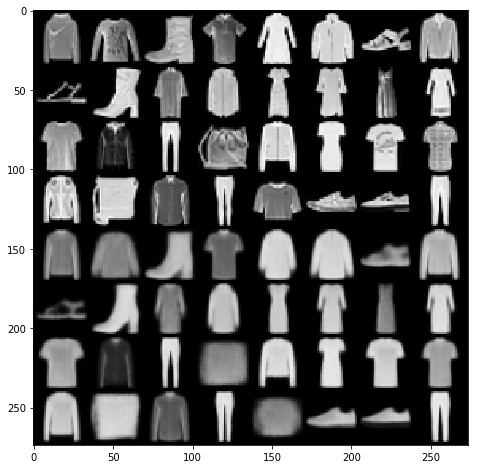

In [28]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt

# Get a batch of data
for batch, labels in test_loader:
    break

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

plt.figure(figsize=(8,8))
plt.imshow(recon.numpy()[0, :, :], cmap='gray');

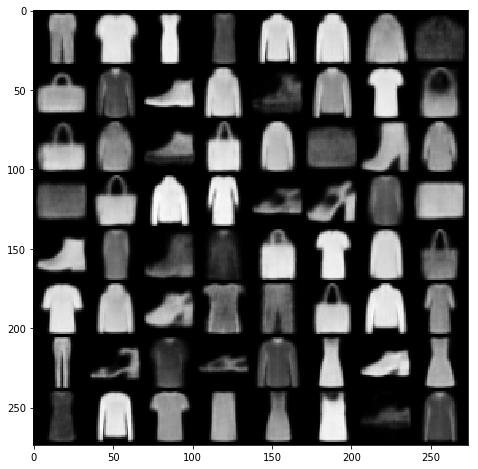

In [30]:
# Plot samples
samples = viz.samples()

plt.figure(figsize=(8,8))
plt.imshow(samples.numpy()[0, :, :], cmap='gray');

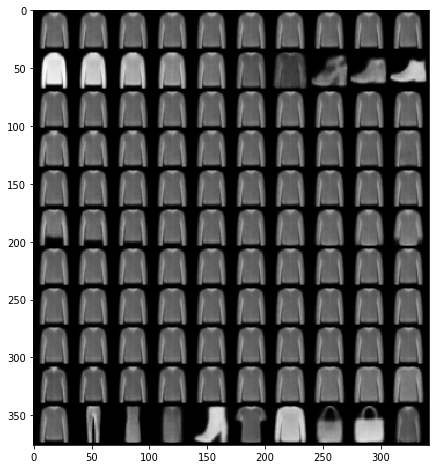

In [34]:
# Plot all traversals
traversals = viz.all_latent_traversals(size=10)

plt.figure(figsize=(8,8))
plt.imshow(traversals.numpy()[0, :, :], cmap='gray');

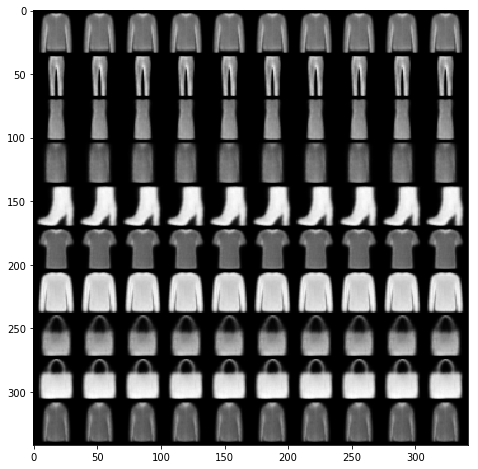

In [35]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))

plt.figure(figsize=(8,8))
plt.imshow(traversals.numpy()[0, :, :], cmap='gray');

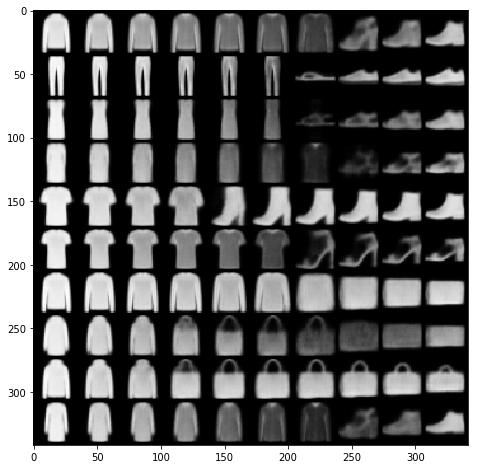

In [60]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=1, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))

plt.figure(figsize=(8,8))
plt.imshow(traversals.numpy()[0, :, :], cmap='gray');

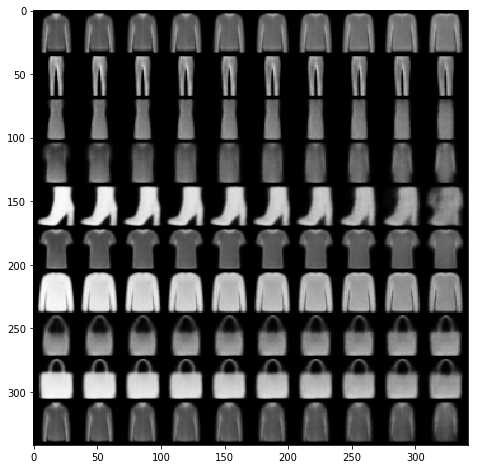

In [75]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=9, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))

plt.figure(figsize=(8,8))
plt.imshow(traversals.numpy()[0, :, :], cmap='gray');

### Save Model

In [76]:
model_name = "jvae_fmnist_oct292018.pth"

In [77]:
torch.save(model.state_dict(),"statedict_" + model_name) # save state dict
torch.save(model, model_name) # save full model

#### Restore Model from State Dict

In [79]:
sd_model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32))
sd_model.load_state_dict(torch.load("statedict_" + model_name))

#### Restore Full Model
* Note in this case the serialized data is bound to the specific classes and exact directory strucutre used.

In [80]:
full_model = torch.load(model_name)

In [81]:
type(full_model)

jointvae.models.VAE

In [82]:
type(sd_model)

jointvae.models.VAE